### Primero cargamos las librerías con las cuáles vamos a trabajar.

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import traceback
import re
import string
import pandas.core.algorithms as algos
from pandas import Series
import os
import datetime as dt
import matplotlib as matplot
conda install -c anaconda seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import relativedelta
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
#!pip install seaborn
#conda install -c anaconda seaborn=0.9.0

SyntaxError: invalid syntax (<ipython-input-7-a82982e1ca79>, line 12)

### Cargamos el data set con la librerías pandas

In [8]:
### Desde nuestro github público consumimos el archivo csv originas
df=pd.read_csv('https://raw.githubusercontent.com/poncho6296/Modelo_Hackathon/main/data/ubicaciones.csv')

In [9]:
df.head()

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon
0,1,A1,1,2.0,20.506052,-98.212377
1,2,A1,1,17.0,20.458128,-98.221248
2,3,A1,1,2.0,20.530427,-98.236860
3,4,A1,3,15.0,20.488655,-98.202940
4,5,A1,1,2.0,20.533253,-98.219669


In [10]:
# Se extrajeron los datos para hacer el analisis exploratorio en una herramienta de BI
#df.to_csv(r'Documents\Hack.csv', index = False)

### Graficaremos los datos en un mapa 

In [11]:
df['Volumen_total']=df['Vol_Entrega']*df['Frecuencia']

In [12]:
latitude=df['lat'].to_list()
longitude=df['lon'].to_list()


In [13]:
map_Zonas = folium.Map(location=[20.506052, -98.212377], zoom_start=12)
for lati, lng in zip(df['lat'], df['lon']):
    folium.CircleMarker(
        [lati, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Zonas)  
    
map_Zonas

### Los puntos se encuentran en el edo de Hidalgo

### Vamos a hacer un análisis exploratorio

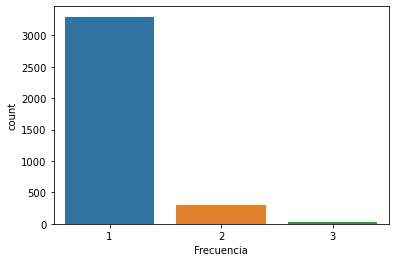

In [14]:
ax = sns.countplot(x="Frecuencia", data=df)

In [15]:
bx=sns.histplot(data=df,x="Frecuencia")

AttributeError: module 'seaborn' has no attribute 'histplot'

In [ ]:
sns.set(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining pynacl: 100%|##########| 315/315 [09:30<00:00,  1.06it/s]
                                                                   

Determining conflicts:   0%|          | 0/315 [00:00<?, ?it/s]
Examining conflict for bottleneck mkl_fft pandas imageio dask mkl-service bkcharts pywavelets pytables mkl_random numexpr seaborn astropy scikit-image bokeh statsmodels scikit-learn matplotlib-base anaconda matplotlib folium h5py nltk numba numpy-base altair patsy scipy numpy:   0%|          | 0/315 [00:00<?, ?it/s]
Examining conflict for bottleneck mkl_fft pandas imageio dask mkl-service bkcharts pywavelets pytables mkl_random numexpr seaborn astropy scikit-image bokeh statsmodels scikit-learn matplotlib-base anaconda blas matplotlib folium h5py nltk numba numpy-base altair patsy scipy numpy:   0%|          | 1/315 [00:16<1:28:16, 16.87s/it]
Examining conflict for bottleneck mkl_fft pandas imageio dask mkl-service bkcharts pywavelets pytables mkl_random numexpr seaborn astropy scikit-ima

imageio -> numpy -> vc[version='14.*|9.*|>=14.1,<15.0a0']
werkzeug -> python -> vc[version='14.*|>=14.1,<15.0a0|9.*']
bitarray -> vc[version='14.*|9.*|>=14.1,<15.0a0']
ipywidgets -> python -> vc[version='14.*|>=14.1,<15.0a0|9.*']
imagesize -> python -> vc[version='14.*|>=14.1,<15.0a0|9.*']
py -> python -> vc[version='14.*|>=14.1,<15.0a0|9.*']
zope -> python[version='>=3.8,<3.9.0a0'] -> vc[version='14.*|9.*|>=14.1,<15.0a0']
anaconda==2020.07 -> vc==14.1=h0510ff6_4
sphinx -> python[version='>=3.5'] -> vc[version='14.*|>=14.1,<15.0a0|9.*']
setuptools -> python[version='>=3.6,<3.7.0a0'] -> vc[version='14.*|>=14.1,<15.0a0|9.*']
pandocfilters -> python[version='>=3.8,<3.9.0a0'] -> vc[version='14.*|>=14.1,<15.0a0|9.*']
libiconv -> vc[version='14.*|9.*']
fsspec -> python[version='>=3.5'] -> vc[version='14.*|>=14.1,<15.0a0']
wincertstore -> vc[version='>=14.1,<15.0a0']
openpyxl -> python[version='>=3.6'] -> vc[version='14.*|>=14.1,<15.0a0|9.*']
decorator -> python -> vc[version='14.*|>=14.1,<15

sphinxcontrib -> python[version='>=3.8,<3.9.0a0'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
zope.interface -> vc[version='>=14.1,<15.0a0'] -> vs2015_runtime[version='>=14.0.25123,<15.0a0|>=14.0.25420|>=14.15.26706|>=14.16.27012']
qtawesome -> python -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
xlrd -> python[version='>=3.6,<3.7.0a0'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
nbformat -> python[version='>=3.5'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
yaml -> vc[version='>=14.1,<15.0a0'] -> vs2015_runtime[version='>=14.0.25123,<15.0a0|>=14.0.25420|>=14.15.26706|>=14.16.27012']
mccabe -> python[version='>=3.8,<3.9.0a0'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
numpy -> python[version='>=3.6,<3.7.0a0'] -> vs2015_runtime[version='>=14.0.25123,<15.0a0|>=14.0.25420|>=14.15.26706|>=14.16.27012']
toml -> python -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
python-jsonrpc-server -> python -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
ipython

pyqt -> sip[version='4.18.*|>=4.19.4|>=4.19.4,<=4.19.8|>=4.19.13,<=4.19.14']
anaconda-navigator -> pyqt[version='>=5.6,<6.0a0'] -> sip[version='4.18.*|>=4.19.4|>=4.19.4,<=4.19.8|>=4.19.13,<=4.19.14']
anaconda==2020.07 -> pyqt==5.9.2=py36h6538335_2 -> sip[version='>=4.19.13,<=4.19.14|>=4.19.4|>=4.19.4,<=4.19.8']
qtconsole -> pyqt -> sip[version='4.18.*|>=4.19.4|>=4.19.4,<=4.19.8|>=4.19.13,<=4.19.14']
anaconda==2020.07 -> sip[version='4.19.13|4.19.8',build='py38ha925a31_0|py36h6538335_0|py37h6538335_0']
navigator-updater -> pyqt[version='>=5.6'] -> sip[version='4.18.*|>=4.19.4|>=4.19.4,<=4.19.8|>=4.19.13,<=4.19.14']
matplotlib -> pyqt -> sip[version='4.18.*|>=4.19.4|>=4.19.4,<=4.19.8|>=4.19.13,<=4.19.14']
spyder -> pyqt[version='>=5.6,<5.13'] -> sip[version='4.18.*|>=4.19.4|>=4.19.4,<=4.19.8|>=4.19.13,<=4.19.14']

Package futures conflicts for:
conda-package-handling -> futures
bokeh -> futures[version='>=3.0.3']
jupyter_client -> tornado[version='>=4.1'] -> futures
isort -> futures
matp

In [ ]:
def estep(X: np.ndarray, mixture: GaussianMixture) -> np.ndarray:
    """E-step: Assigns each datapoint to the gaussian component with the
    closest mean

    Args:
        X: (n, d) array holding the data
        mixture: the current gaussian mixture

    Returns:
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples

        """
    n, _ = X.shape
    K, _ = mixture.mu.shape
    post = np.zeros((n, K))

    for i in range(n):
        tiled_vector = np.tile(X[i, :], (K, 1))
        sse = ((tiled_vector - mixture.mu)**2).sum(axis=1)
        j = np.argmin(sse)
        post[i, j] = 1

    return post


def mstep(X: np.ndarray, post: np.ndarray) -> Tuple[GaussianMixture, float]:
    """M-step: Updates the gaussian mixture. Each cluster
    yields a component mean and variance.

    Args: X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
        float: the distortion cost for the current assignment
    """
    n, d = X.shape
    _, K = post.shape

    n_hat = post.sum(axis=0)
    p = n_hat / n

    cost = 0
    mu = np.zeros((K, d))
    var = np.zeros(K)

    for j in range(K):
        mu[j, :] = post[:, j] @ X / n_hat[j]
        sse = ((mu[j] - X)**2).sum(axis=1) @ post[:, j]
        cost += sse
        var[j] = sse / (d * n_hat[j])

    return GaussianMixture(mu, var, p), cost


def run(X: np.ndarray, mixture: GaussianMixture,
        post: np.ndarray) -> Tuple[GaussianMixture, np.ndarray, float]:
    """Runs the mixture model

    Args:
        X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples
        float: distortion cost of the current assignment
    """

    prev_cost = None
    cost = None
    while (prev_cost is None or prev_cost - cost > 1e-4):
        prev_cost = cost
        post = estep(X, mixture)
        mixture, cost = mstep(X, post)

    return mixture, post, cost
